<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 28: The Normal Distribution

Associated Textbook Sections: [14.3, 14.4](https://ccsf-math-108.github.io/textbook/chapters/14/3/SD_and_the_Normal_Curve.html)

---

## Outline

* [Standard Units Review](#Standard-Units-Review)
* [Normal Distributions](#Normal-Distributions)
* [Normal Proportions](#Normal-Proportions)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

---

## Standard Units Review

* How many SDs above average?
* `z = (value - average)/SD`
    * Negative z: value below average
    * Positive z: value above average
    * z = 0: value equal to average
* When values are in standard units: average = 0, SD = 1
* Gives us a way to compare/understand data no matter what the original units


---

### Demo: Standard Units

* Load UC Berkeley DATA 8 exam distribution data from Fall 2018.
* Calculate the mean midterm and final exam scores.
* Visualize the distribution of scores.
* Create a function that calculates the standard units of the numerical values in an array.
* Add the standardized midterm and final exam scores to the `exams` table.
* Visualize the distribution of standardized scores to notice that the general shape of the distribution does not change.

In [ ]:
exams = Table.read_table('exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


In [ ]:
midterm_mean = np.mean(exams.column('Midterm'))
final_mean = np.mean(exams.column('Final'))
midterm_mean, final_mean

(77.832528180199347, 79.207729468599027)

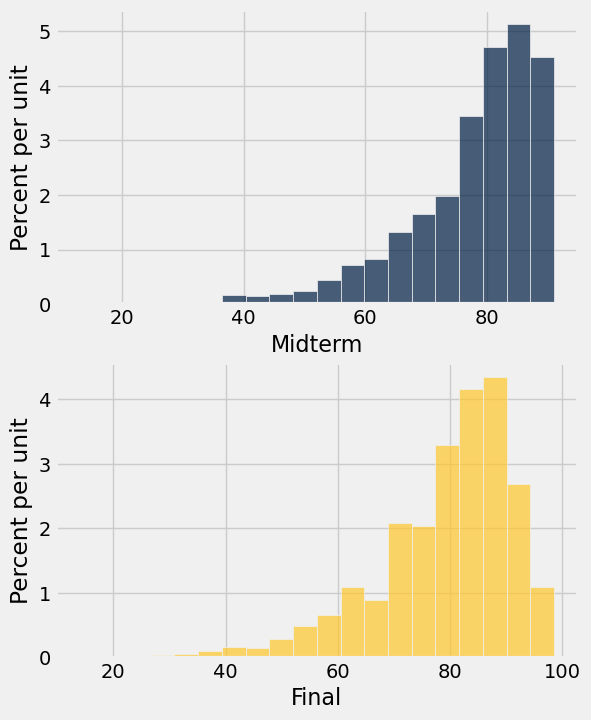

In [ ]:
(exams
 .select('Midterm', 'Final')
 .hist(overlay=False, bins=20))

In [ ]:
np.min(exams.column('Final'))

14.000000000000002

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [ ]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(10)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


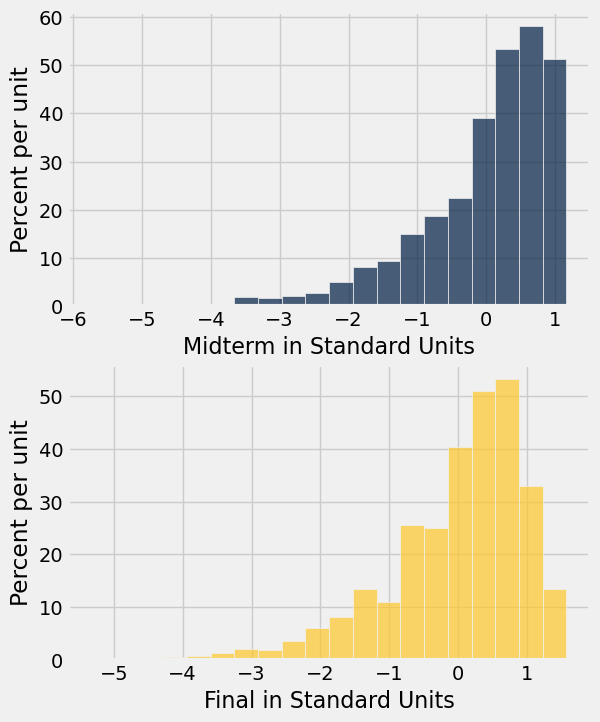

In [ ]:
exams.select(
    'Midterm in Standard Units', 'Final in Standard Units'
).hist(overlay=False, bins=20)

---

## Normal Distributions

---

### Bell-Shaped Curves

<img src="./hanging_bell.jpeg" width=50%>

---

### There are many, many, many normal curves!

<img src="./normal_curves.png" width=50%>

---

### Probability Density Curve

The height of the (probability density) curves are determined by the formula*

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

and the shape is determined by the mean (`mu`, $\mu$) and standard deviation (`sigma`, $\sigma$) values.

_Note: You will not be working with this formula directly in this class, but we can use a python representation of it (`scipy.stats.norm.pdf`) to see how the mean and standard deviation impact the shape of the distribution._

In [ ]:
def graph_norm(mu=0, sigma=1):
    x=np.arange(-10, 10, 0.01)
    display(px.line(x=x,
                    y=scipy.stats.norm.pdf(x, loc=mu, scale=sigma),
                    range_y=[0, 1]));

Adjust the values of `mu` and `sigma` using the slider to see how the shape of the distribution changes.

In [ ]:
interact(graph_norm, mu=(-5, 5), sigma=(0.2**0.5, 5**0.5, 0.05));

interactive(children=(IntSlider(value=0, description='mu', max=5, min=-5), FloatSlider(value=1.0, description=…

---

## Normal Proportions

---

### How Big are Most of the Values?

* No matter what the shape of the distribution, the bulk of the data are in the range "average ± a few SDs" (Chebyshev's Inequality)
* **If a histogram is bell-shaped**, then almost all of the data are in the range "average ± 3 SDs"


---

### Bounds and Normal Approximations

<img src="./normal_bounds.png" width = 50%>

---

### A "Central" Area

<img src="./central_area.png" width = 50%>

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>